<a href="https://colab.research.google.com/github/Agrave1/NFL_Scores/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
betting_df = pd.read_csv("/content/drive/MyDrive/Project 2/Spread_Scores.csv")
betting_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,total_score,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,37,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,52,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,34,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,33,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,27,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


## Data Cleaning

In [15]:
betting_df.duplicated().sum()

0

In [16]:
betting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13232 non-null  object 
 1   schedule_season      13232 non-null  int64  
 2   schedule_week        13232 non-null  object 
 3   schedule_playoff     13232 non-null  bool   
 4   team_home            13232 non-null  object 
 5   score_home           13231 non-null  float64
 6   score_away           13231 non-null  float64
 7   total_score          13232 non-null  int64  
 8   team_away            13232 non-null  object 
 9   team_favorite_id     10753 non-null  object 
 10  spread_favorite      10753 non-null  float64
 11  over_under_line      10743 non-null  object 
 12  stadium              13232 non-null  object 
 13  stadium_neutral      13232 non-null  bool   
 14  weather_temperature  12189 non-null  float64
 15  weather_wind_mph     12172 non-null 

In [17]:
betting_df.isna().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 1
score_away                 1
total_score                0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1043
weather_wind_mph        1060
weather_humidity        4791
weather_detail         10410
dtype: int64

In [18]:
betting_df = betting_df.drop(labels = range(0,2500), axis = 0)
#Dropped those rows because all the missing values were at the start of the dataset
#Didn't impute because these betting statistics can't be imputed or they would skew the results for the games with accurate betting data

In [19]:
betting_df["schedule_week"].replace({"SuperBowl" : "Superbowl", "WildCard" : "Wildcard"}, inplace = True)
betting_df["schedule_week"].value_counts()

16            649
15            649
1             647
2             647
13            645
14            644
12            641
11            625
3             598
10            589
9             572
4             572
7             569
8             567
5             560
6             557
17            509
Division      172
Wildcard      160
Conference     86
Superbowl      44
18             30
Name: schedule_week, dtype: int64

In [20]:
betting_df["score_home"].fillna(23, inplace = True)
betting_df["score_away"].fillna(20, inplace = True)
#Filled in missing values for Superbowl 2021 season with correct score after google searching

In [21]:
betting_df = betting_df.drop(columns = ["weather_detail"])
#Too many categorical values and too many missing values to input based on most frequent
#Most frequent was dome and many stadiums and games would be incorrectly classified as dome if imputed

In [22]:
betting_df.isna().sum()

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
total_score               0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     813
weather_wind_mph        830
weather_humidity       4400
dtype: int64

In [23]:
betting_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,total_score,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity
2500,1/21/1979,1978,Superbowl,True,Dallas Cowboys,31.0,35.0,66,Pittsburgh Steelers,PIT,-3.5,37,Orange Bowl,True,71.0,18.0,84.0
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,47,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,16,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,9,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,10,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0


In [34]:
betting_df["schedule_week"].value_counts()
betting_df.replace({"Wildcard" : 19, "Division" : 20, "Conference" : 21, "Superbowl" : 22}, inplace = True)
betting_df["schedule_week"] = betting_df["schedule_week"].astype(int)
betting_df["schedule_week"].value_counts()

16    649
15    649
1     647
2     647
13    645
14    644
12    641
11    625
3     598
10    589
9     572
4     572
7     569
8     567
5     560
6     557
17    509
20    172
19    160
21     86
22     44
18     30
Name: schedule_week, dtype: int64

# Visualizations

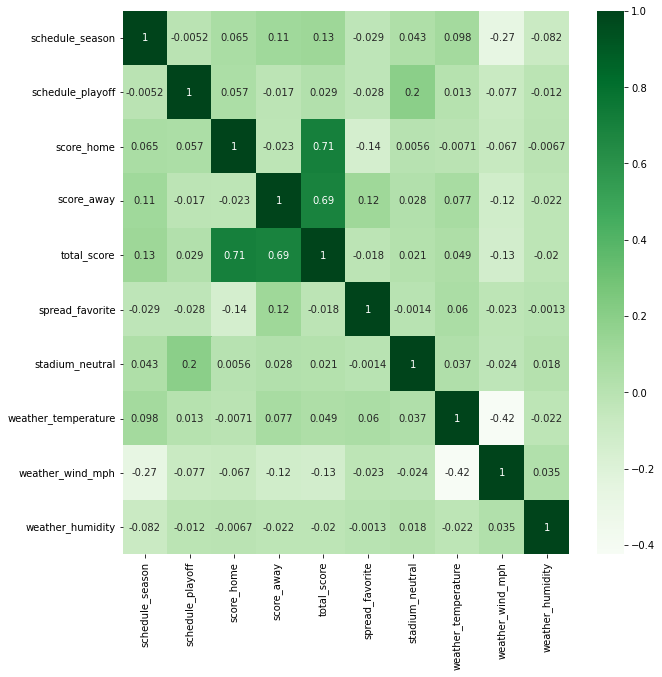

In [24]:
corr = betting_df.corr()
fig, axes = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, cmap = "Greens", annot = True)
plt.show()

*   There is a negative correlation between wind speed and total score. As wind speed increases there is a slight decrease in total score. The increased wind speed perhaps makes it harder to throw the football and make fieldgoals which both contribute to scoring
*   Schedule season has a positive correlation with total score. NFL game total scores have increased over the years with away team scores contributing more to the increase than home teams
*   There is a positive correlation between away score and spread favorite. The expected and resulting away team score influences the spread favorite more than the home team



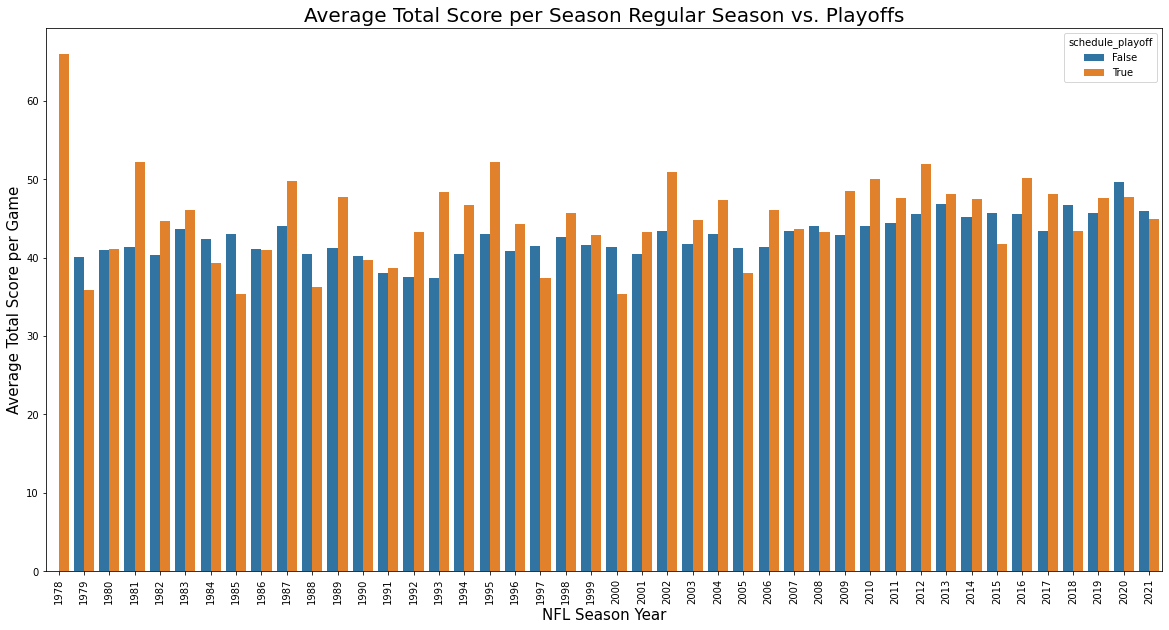

In [55]:
fig, axes = plt.subplots(figsize = (20, 10))
season = betting_df.groupby(["schedule_season", "schedule_playoff"]).mean().reset_index()
season = season.sort_values(by = "total_score")
sns.barplot(data = season, x = "schedule_season", y = "total_score", hue = "schedule_playoff")
plt.xticks(rotation = 90)
plt.ylabel("Average Total Score per Game", fontsize = 15)
plt.xlabel("NFL Season Year", fontsize = 15)
plt.title("Average Total Score per Season Regular Season vs. Playoffs", fontsize = 20)
plt.show()

On average scoring is higher in the playoffs than during the regular season. The postseason has signficantly fewer games allowing for outliers to affect the average score. This also shows that offense is perhaps more significant for postseason games and success than defense. From the 1979 regular season until now, scoring has risen approximately 4 points per game.

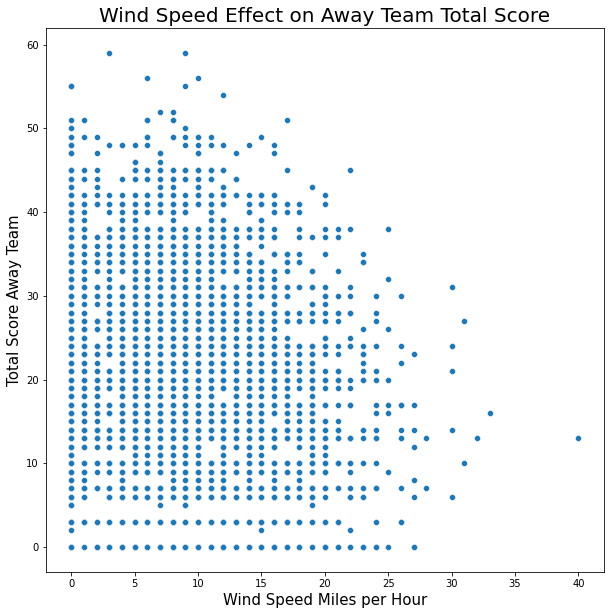

In [68]:
fig, axes = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = betting_df, x = "weather_wind_mph", y = "score_away")
plt.ylabel("Total Score Away Team", fontsize = 15)
plt.xlabel("Wind Speed Miles per Hour", fontsize = 15)
plt.title("Wind Speed Effect on Away Team Total Score", fontsize = 20)
plt.show()

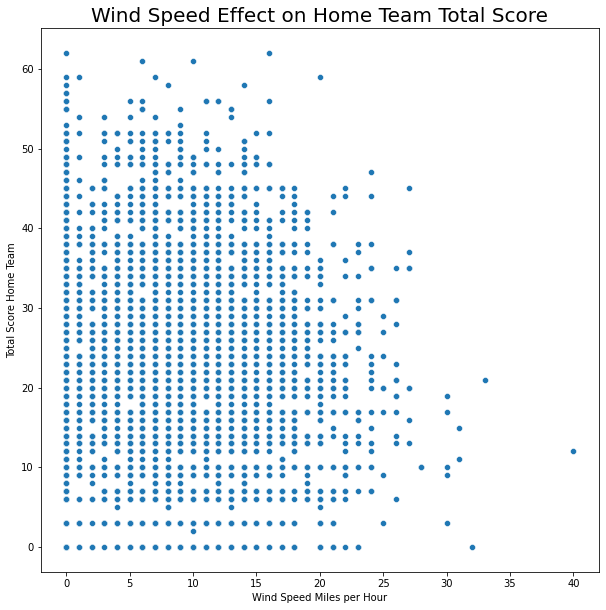

In [67]:
fig, axes = plt.subplots(figsize = (10, 10))
sns.scatterplot(data = betting_df, x = "weather_wind_mph", y = "score_home")
plt.ylabel("Total Score Home Team")
plt.xlabel("Wind Speed Miles per Hour")
plt.title("Wind Speed Effect on Home Team Total Score", fontsize = 20)
plt.show()

While not significant, there is a slight downward trend in overall scoring for both the home and away teams. When comparing to other weather data, wind speed is the more significant than temperature or humidity on the scoring outcome.

# Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer

In [ ]:
betting_df["schedule_playoff"].value_counts()
betting_df["schedule_playoff"].replace({False : 0, True : 1}, inplace = True)
betting_df["schedule_playoff"].value_counts()

0    10270
1      462
Name: schedule_playoff, dtype: int64

In [ ]:
betting_df["stadium_neutral"].value_counts()
betting_df["stadium_neutral"].replace({False : 0, True : 1}, inplace = True)
betting_df["stadium_neutral"].value_counts()

0    10642
1       90
Name: stadium_neutral, dtype: int64

In [ ]:
betting_df2 = betting_df.copy()

In [ ]:
X = betting_df2.drop(columns = ["total_score", "schedule_date"])
y = betting_df2["total_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
betting_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 2500 to 13231
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        10732 non-null  object 
 1   schedule_season      10732 non-null  int64  
 2   schedule_week        10732 non-null  int64  
 3   schedule_playoff     10732 non-null  int64  
 4   team_home            10732 non-null  object 
 5   score_home           10732 non-null  float64
 6   score_away           10732 non-null  float64
 7   total_score          10732 non-null  int64  
 8   team_away            10732 non-null  object 
 9   team_favorite_id     10732 non-null  object 
 10  spread_favorite      10732 non-null  float64
 11  over_under_line      10732 non-null  object 
 12  stadium              10732 non-null  object 
 13  stadium_neutral      10732 non-null  int64  
 14  weather_temperature  9919 non-null   float64
 15  weather_wind_mph     9902 non-nul

In [ ]:
num_selector = make_column_selector(dtype_include = "number")
cat_selector = make_column_selector(dtype_include = "object")

In [ ]:
median_imputer = SimpleImputer(strategy = "median")
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

In [ ]:
num_pipe = make_pipeline(median_imputer, scaler)
cat_pipe = make_pipeline(ohe)

In [ ]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff991c45250>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff991c45d90>)])

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff991c45250>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff991c45d90>)])

In [ ]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed

array([[ 0.16479826, -0.66724938, -0.21225747, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24626621, -0.66724938, -0.21225747, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.63122137, -1.04284839, -0.21225747, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.08333031, -1.41844741, -0.21225747, ...,  0.        ,
         0.        ,  0.        ],
       [-1.46456075, -1.41844741, -0.21225747, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65360596, -1.41844741, -0.21225747, ...,  0.        ,
         0.        ,  0.        ]])

# Regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
acc_score_train = knn_pipe.score(X_train_processed, y_train)
acc_score_test = knn_pipe.score(X_test_processed, y_test)
print(f"Training Accuracy: {acc_score_train:.3f}")
print(f"Testing Accuracy: {acc_score_test:.3f}")

Training Accuracy: 1.000
Testing Accuracy: 0.025


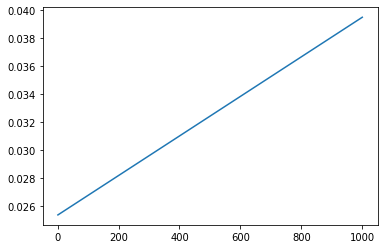

Best K value is 1000 with 0.03950801341781588 accuracy on the test set


In [ ]:
krange = (1, 1000)
test_accuracies = []
best_accuracy = 0
best_k = 0
for k in krange:
  knn_pipe2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = k))
  knn_pipe2.fit(X_train_processed, y_train)
  acc_score = accuracy_score(y_test, knn_pipe2.predict(X_test_processed))
  if acc_score > best_accuracy:
    best_accuracy = acc_score
    bestk = k
  test_accuracies.append(acc_score)
plt.plot(krange, test_accuracies, label = "Test K Scores")
plt.show()
print(f"Best K value is {bestk} with {acc_score} accuracy on the test set")

This model is perhaps overfit because the training accuracy is very high, but the testing accuracy is relatively low. The predictions are very poor on the testing data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [ ]:
dec_tree_train_score = dec_tree.score(X_train_processed, y_train)
dec_tree_test_score = dec_tree.score(X_test_processed, y_test)
print(f"Training Accuracy: {dec_tree_train_score:.3f}")
print(f"Testing Accuracy: {dec_tree_test_score:.3f}")

Training Accuracy: 1.000
Testing Accuracy: 0.998


In [ ]:
depths = list(range(2, 36))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

Text(0, 0.5, 'R2')

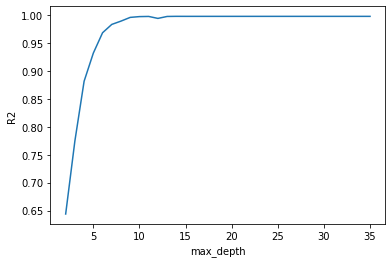

In [ ]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2')

Both the testing and training accuracy are very high for this model. This is opposite to the previous model with a low test score with the model predicting very efficiently.

In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
14,0.998416,0.999999
19,0.998374,1.0
27,0.998374,1.0
22,0.998374,1.0
23,0.998374,1.0
